## Histograms, Binnings, and Density

### Using the following datasets "flights.csv" dataset contains information about the flights of an airport. Airline "airlines.csv" data holds immense importance as it offers insights into the functioning and efficiency of the aviation industry. It provides valuable information about flight routes, schedules, passenger demographics, and preferences, which airlines can leverage to optimize their operations and enhance customer experiences.

### A)You should read both datasets and import the relevant libraries first

In [122]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Read in data
flightFile = pd.read_csv('/flights.csv')
airlineFile = pd.read_csv('/airlines.csv')

A) You should check the shape of the datasets

B) You should find the number of NaN values in both datasets

C) You should remove the NaN values

D) After removing them, You should double-check the number of NaN values in both datasets. What do you notice in this case?

In [96]:
flightFile.shape

(336776, 21)

In [104]:
airlineFile.shape

(98619, 15)

In [98]:
# B
flightFile.isna().sum()

id                   0
year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
name                 0
dtype: int64

In [105]:
# B
airlineFile.isna().sum()

Passenger ID            0
First Name              0
Last Name               0
Gender                  0
Age                     0
Nationality             0
Airport Name            0
Airport Country Code    0
Country Name            0
Airport Continent       0
Continents              0
Departure Date          0
Arrival Airport         0
Pilot Name              0
Flight Status           0
dtype: int64

In [106]:
flightFile.dropna(inplace=True)
airlineFile.dropna(inplace=True)

In [107]:
flightFile.isna().sum()

id                0
year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
time_hour         0
name              0
dtype: int64

A) Now, you should combine the flights DataFrame with the airlines DataFrame to include additional information about the carriers by matching the carrier column from flights with the Passenger ID column from airlines?

Hint: use merge between two dataframe

In [108]:
flightFile = flightFile.merge(airlineFile, how='left', left_on='carrier', right_on='Passenger ID')
flights = flightFile[['arr_delay', 'name']] 

A) You should filter flight delays between -60 and 120 minutes

In [110]:
flights = flights[flights['arr_delay'].between(-60, 120)]
flights.head(5)

,arr_delay,name
0,11.0,United Air Lines Inc.
1,20.0,United Air Lines Inc.
2,33.0,American Airlines Inc.
3,-18.0,JetBlue Airways
4,-25.0,Delta Air Lines Inc.


A) You should plot a histogram using matplotlib, bins must be integer and the figure size is (9, 7) with a blue color

B) Make sure that you add a title and labels to the figure

C) Show 2 other different binwidths, density, and alpha

Text(0, 0.5, 'Flights')

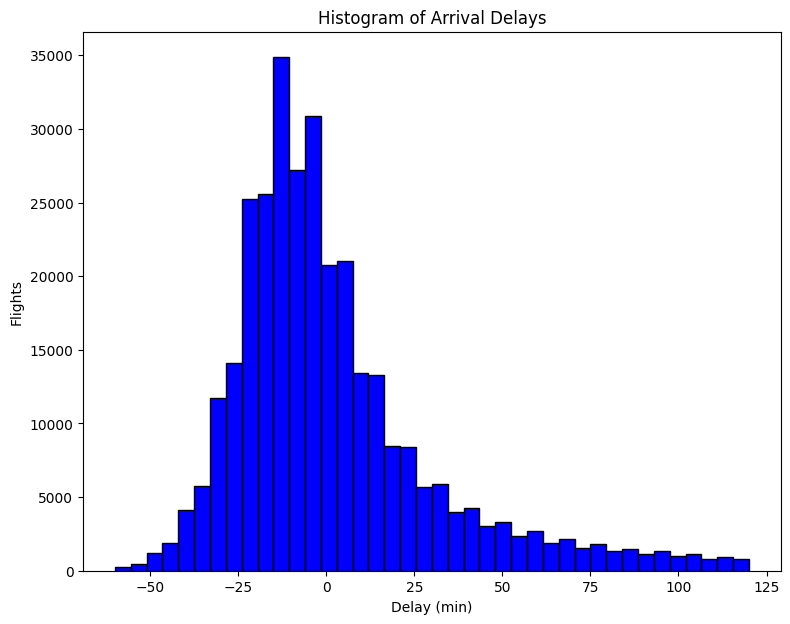

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(9, 7))
# Make the histogram using matplotlib, bins must be integer
plt.hist(flights['arr_delay'], color='blue', edgecolor='black', bins=40)
# Add labels
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')


Text(0, 0.5, 'Flights')

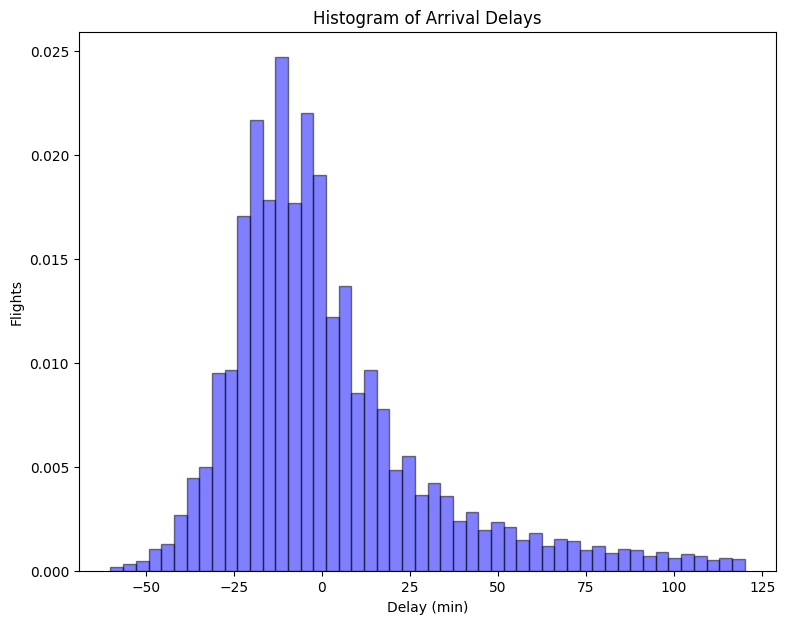

In [115]:
#C)

import pandas as pd
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(9, 7))

# Make the histogram using matplotlib, bins must be integer
plt.hist(flights['arr_delay'], color='blue', edgecolor='black', bins= 50, density=True, alpha=0.5)

# Add labels
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')


How do the arrival delays compare between two different carriers (AA and DL) for flights with delays ranging above 250 minutes?

A) First, you should select delays from two different carriers

B) THen, filter delays to only include those between 0 and 250 minutes

C) The figure size (12, 12)

D) You should define the histogram properties using a dictionary:
    density, bins, alpha, histtype


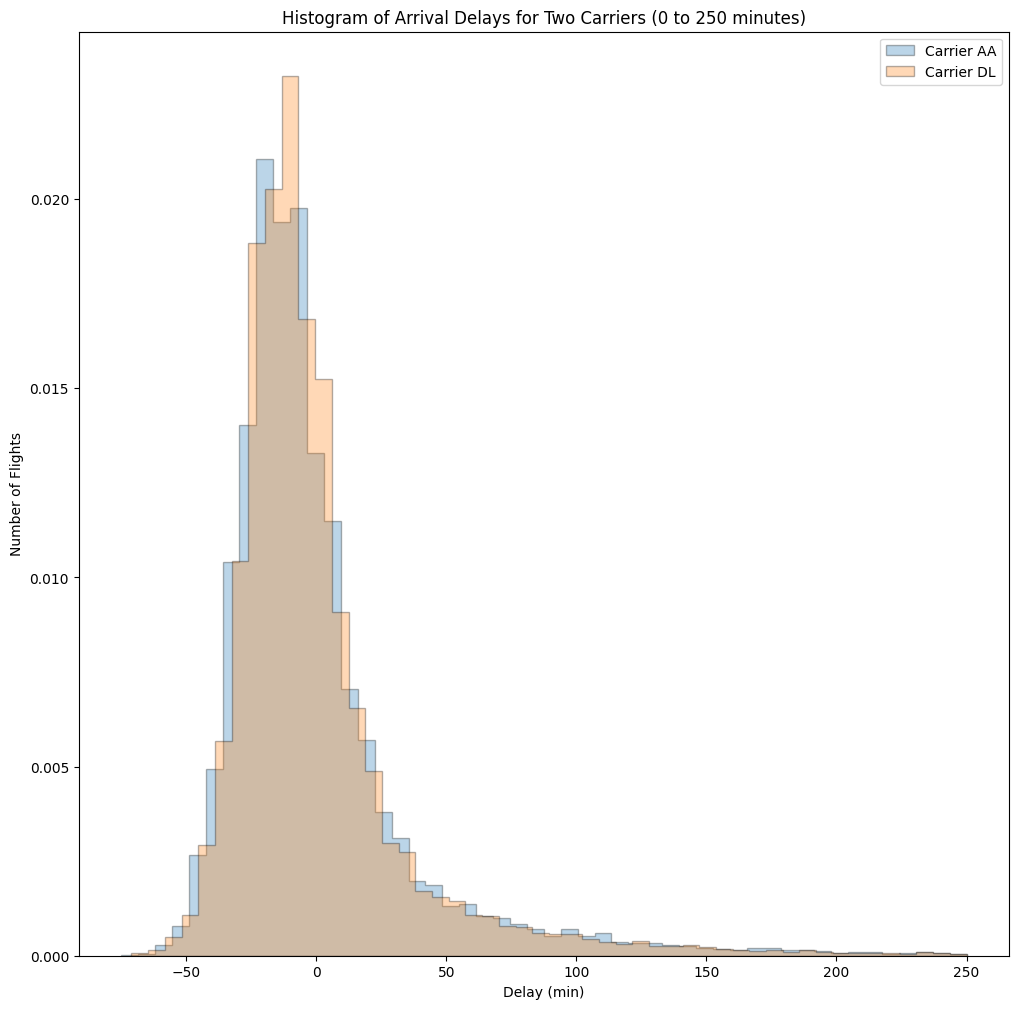

In [120]:
import matplotlib.pyplot as plt

# Selecting delays from two different carriers
carrier1_delays = flightFile[flightFile['carrier'] == 'AA']['arr_delay'] 
carrier2_delays = flightFile[flightFile['carrier'] == 'DL']['arr_delay'] 

# Filter delays to only include those between 0 and 250 minutes
carrier1_delays = carrier1_delays[(carrier1_delays <= 250)]
carrier2_delays = carrier2_delays[(carrier2_delays <= 250)]

# Set the figure size
plt.figure(figsize=(12, 12))

# Define histogram properties
kwargs = {
    'bins': 50,               # Number of bins
    'alpha': 0.3,             # Transparency of the bars
    'density': True,
    'histtype': 'stepfilled',
    'edgecolor': 'black'      # Color of the edges
}

# Plot the histograms
plt.hist(carrier1_delays, **kwargs, label='Carrier AA')
plt.hist(carrier2_delays, **kwargs, label='Carrier DL')

# Add titles and labels
plt.title('Histogram of Arrival Delays for Two Carriers (0 to 250 minutes)')
plt.xlabel('Delay (min)')
plt.ylabel('Number of Flights')
plt.legend()
